## Importing libraries

In [162]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Importing data

In [163]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [164]:
len(X_train)

60000

In [165]:
len(X_test)

10000

In [166]:
X_train[0].shape

(28, 28)

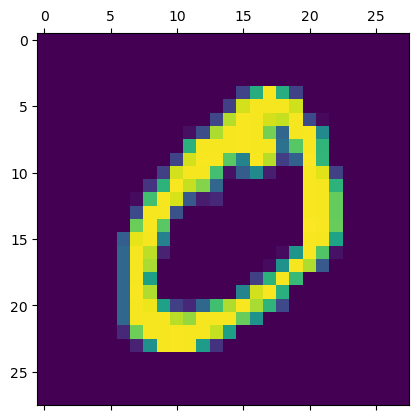

In [167]:
plt.matshow(X_train[1])
plt.show()

In [168]:
y_train[1]

0

## Scaling data for better accuracy

In [169]:
X_train=X_train/255
X_test=X_test/255

## Reshaping the data

In [170]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [171]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


## Model Creation

In [172]:
single_layer_model=keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation="sigmoid")
])


## Model compilation

In [173]:
single_layer_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## Model Training

In [174]:
single_layer_model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8183 - loss: 0.7181
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9136 - loss: 0.3123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9215 - loss: 0.2782
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9256 - loss: 0.2655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9249 - loss: 0.2649


## Model Evaluation

In [175]:
single_layer_model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.3031


[0.26698461174964905, 0.926800012588501]

## Visualization

In [176]:
y_pred=single_layer_model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [177]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    7,  933,   18,    7,    5,   11,    9,   36,    3],
       [   3,    0,   18,  927,    0,   26,    2,   12,   16,    6],
       [   1,    1,    8,    2,  914,    0,    8,    5,   11,   32],
       [   7,    3,    7,   37,    7,  788,    8,    6,   24,    5],
       [  12,    3,   11,    1,    7,   16,  904,    2,    2,    0],
       [   1,    5,   24,    4,    4,    1,    0,  962,    4,   23],
       [   5,    7,    7,   31,    9,   31,    8,   13,  857,    6],
       [   9,    7,    2,   12,   26,    7,    0,   32,    5,  909]])>

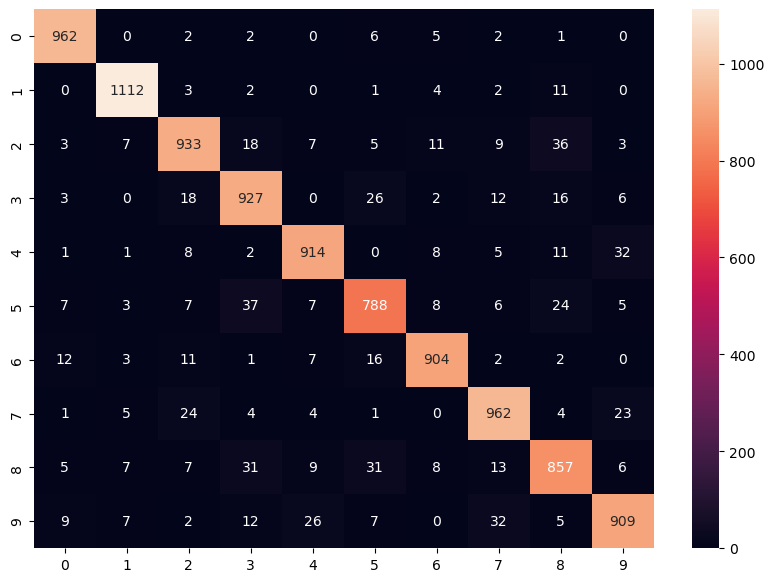

In [178]:
plt.figure(figsize=(10,7))
plt.xlabel("Pred")
plt.ylabel("Truth")
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.show()

### Model gives accuracy of 92.65%
### To improve accuracy we are going to add one hidden laye in model

## 2 layered model creation

In [179]:
Two_layer_model=keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

In [180]:
Two_layer_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [181]:
Two_layer_model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8660 - loss: 0.4730
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9599 - loss: 0.1377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0904
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0683
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9833 - loss: 0.0519


In [182]:
Two_layer_model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.1008


[0.08367861062288284, 0.9753999710083008]

## Addition of 1 extra layer imnproves accuracy from 92% to 97%

## Visualization

In [183]:
y_pred=Two_layer_model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [184]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    4,    0,    1,    0,    3,    2,    2,    1],
       [   0, 1123,    4,    0,    0,    0,    2,    1,    5,    0],
       [   0,    0, 1022,    0,    2,    0,    1,    5,    2,    0],
       [   0,    0,   14,  986,    1,    0,    0,    6,    3,    0],
       [   0,    0,    8,    0,  959,    0,    2,    3,    1,    9],
       [   6,    1,    0,   23,    1,  849,    3,    1,    6,    2],
       [   5,    3,    2,    1,    5,    2,  935,    1,    4,    0],
       [   1,    4,   13,    2,    0,    0,    0, 1001,    2,    5],
       [   4,    0,    7,    7,    5,    2,    2,    5,  939,    3],
       [   3,    3,    0,    7,   10,    1,    0,    8,    3,  974]])>

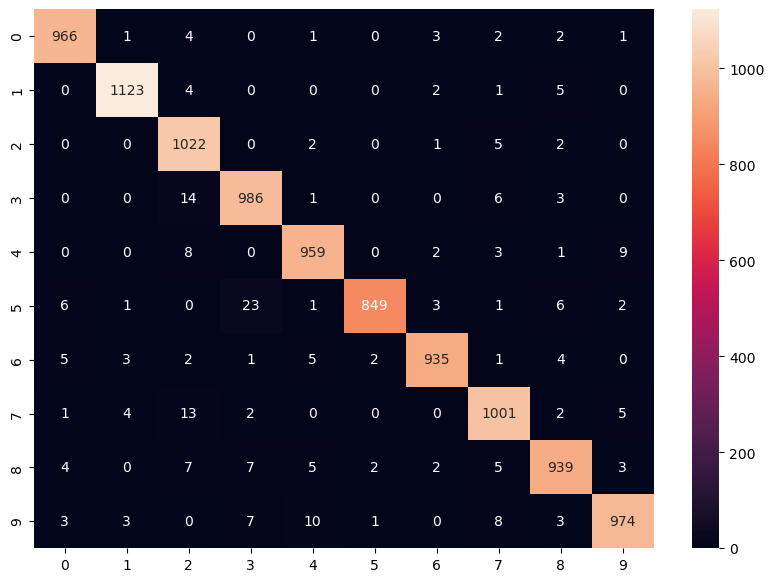

In [185]:
plt.figure(figsize=(10,7))
plt.xlabel("Pred")
plt.ylabel("Truth")
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.show()